<a href="https://colab.research.google.com/github/sanketdholi33/Data-science-assignment/blob/main/gold_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

In [15]:
import calendar

In [17]:
## lets read the data
daily = pd.read_csv("Gold_data.csv")
print(daily)

            date    price  year
0       1/1/2016  2252.60  2016
1       1/2/2016  2454.50  2016
2       1/3/2016  2708.10  2016
3       1/4/2016  2577.80  2016
4       1/5/2016  2597.75  2016
...          ...      ...   ...
2177  12/17/2021  4394.40  2021
2178  12/18/2021  4389.50  2021
2179  12/19/2021  4389.50  2021
2180  12/20/2021  4354.10  2021
2181  12/21/2021  4346.50  2021

[2182 rows x 3 columns]


In [18]:
df = daily.iloc[:, [1, 2]]

In [ ]:
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [19]:
df.describe()

,price,year
count,2182.000000,2182.000000
mean,3284.450046,2018.487626
std,719.564434,1.704589
min,2252.600000,2016.000000
25%,2697.020000,2017.000000
50%,2879.800000,2018.000000
75%,4147.325000,2020.000000
max,4966.300000,2021.000000


In [20]:
df.isna().sum()

price    0
year     0
dtype: int64

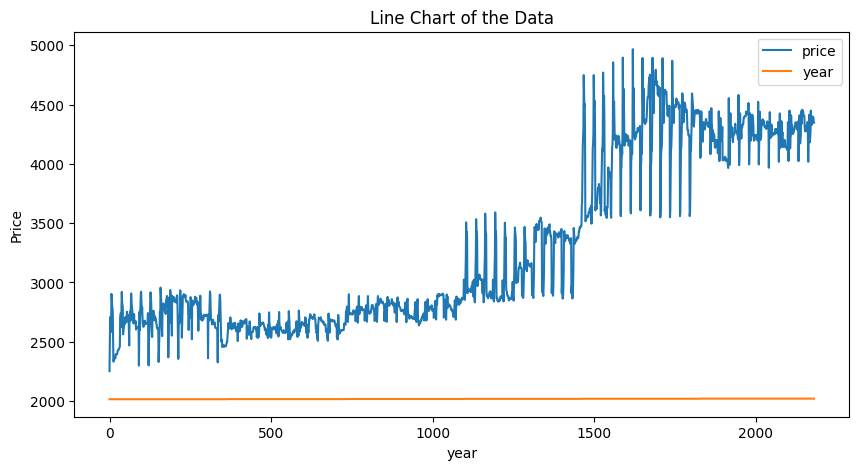

In [24]:
df.plot(kind='line', figsize=(10, 5))
plt.title('Line Chart of the Data')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

In [28]:
df1 = df[['year','price']]
df1.head()

,year,price
0,2016,2252.60
1,2016,2454.50
2,2016,2708.10
3,2016,2577.80
4,2016,2597.75


In [29]:
df2 = df1.dropna()

In [30]:
df2

,year,price
0,2016,2252.60
1,2016,2454.50
2,2016,2708.10
3,2016,2577.80
4,2016,2597.75
...,...,...
2177,2021,4394.40
2178,2021,4389.50
2179,2021,4389.50
2180,2021,4354.10


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2182 non-null   int64  
 1   price   2182 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 34.2 KB


In [32]:
df2.describe()

,year,price
count,2182.000000,2182.000000
mean,2018.487626,3284.450046
std,1.704589,719.564434
min,2016.000000,2252.600000
25%,2017.000000,2697.020000
50%,2018.000000,2879.800000
75%,2020.000000,4147.325000
max,2021.000000,4966.300000


In [33]:
df2.isna().sum()

year     0
price    0
dtype: int64

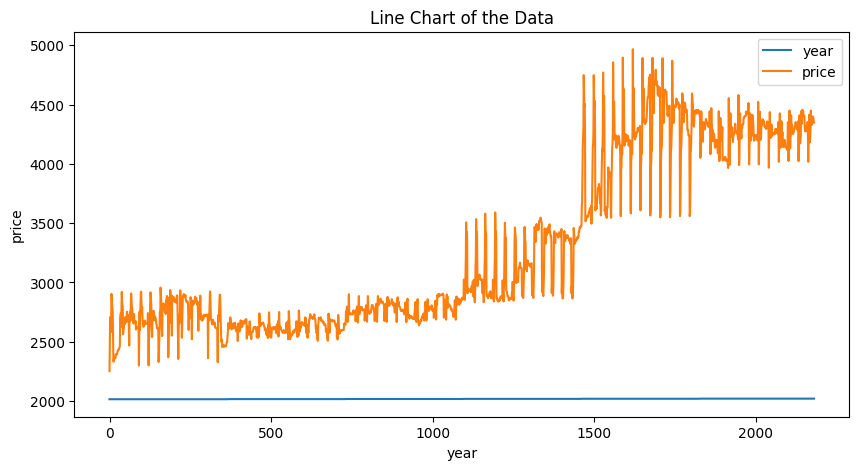

In [43]:
df2.plot(kind='line', figsize=(10, 5))
plt.title('Line Chart of the Data')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

In [37]:
year = df2['year']

In [38]:
price = df2['price']

In [39]:
price

0       2252.60
1       2454.50
2       2708.10
3       2577.80
4       2597.75
         ...   
2177    4394.40
2178    4389.50
2179    4389.50
2180    4354.10
2181    4346.50
Name: price, Length: 2182, dtype: float64

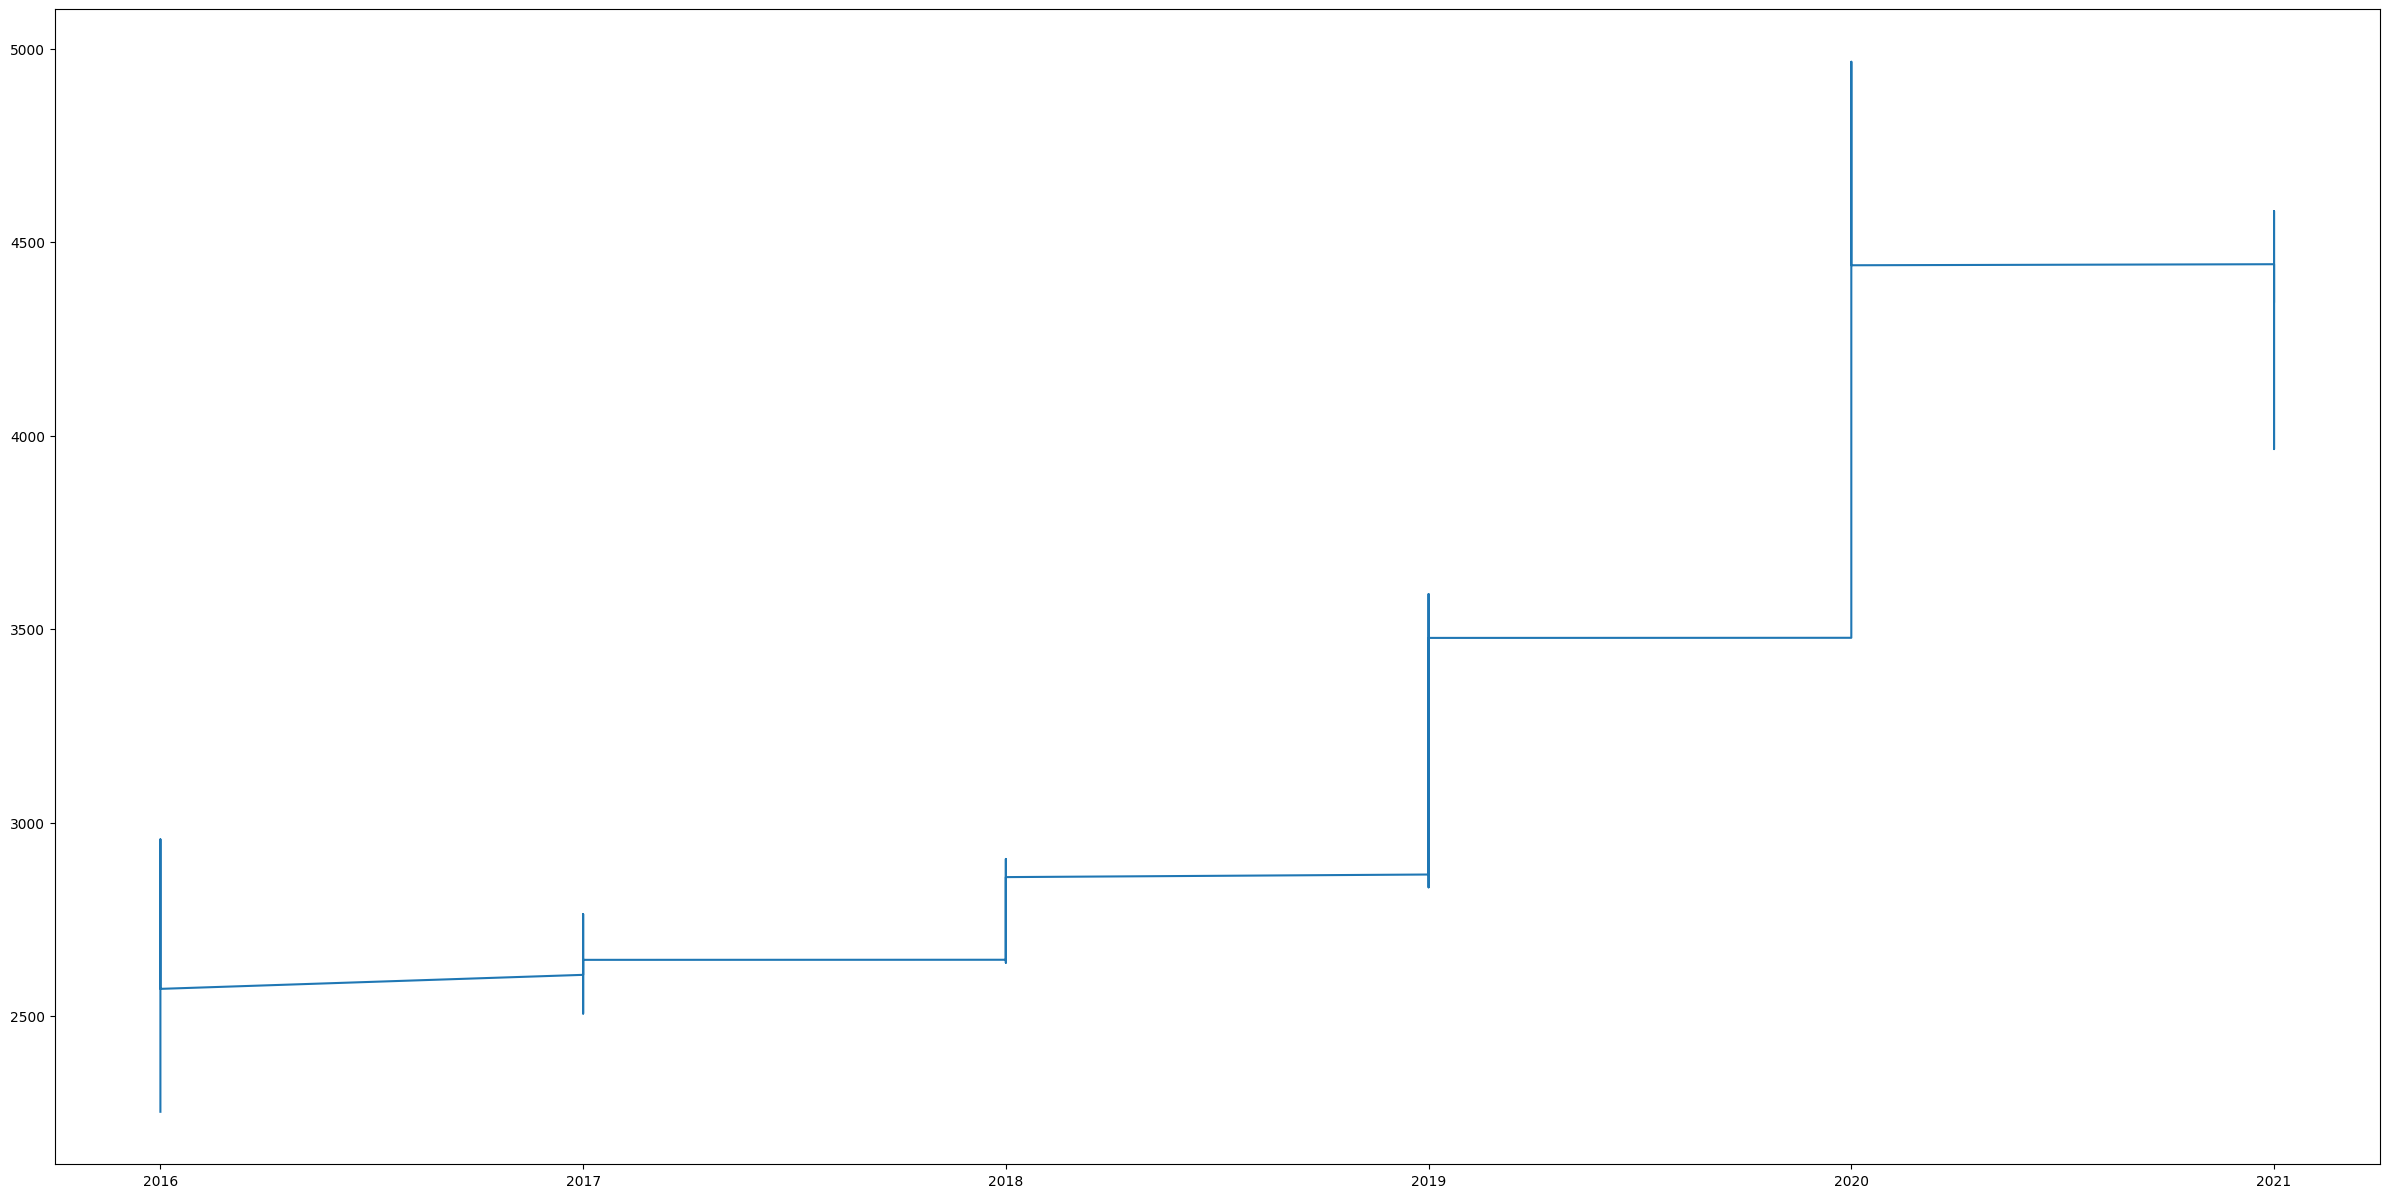

In [41]:
plt.figure(figsize=(30,15))
plt.plot(year, price)
plt.show()

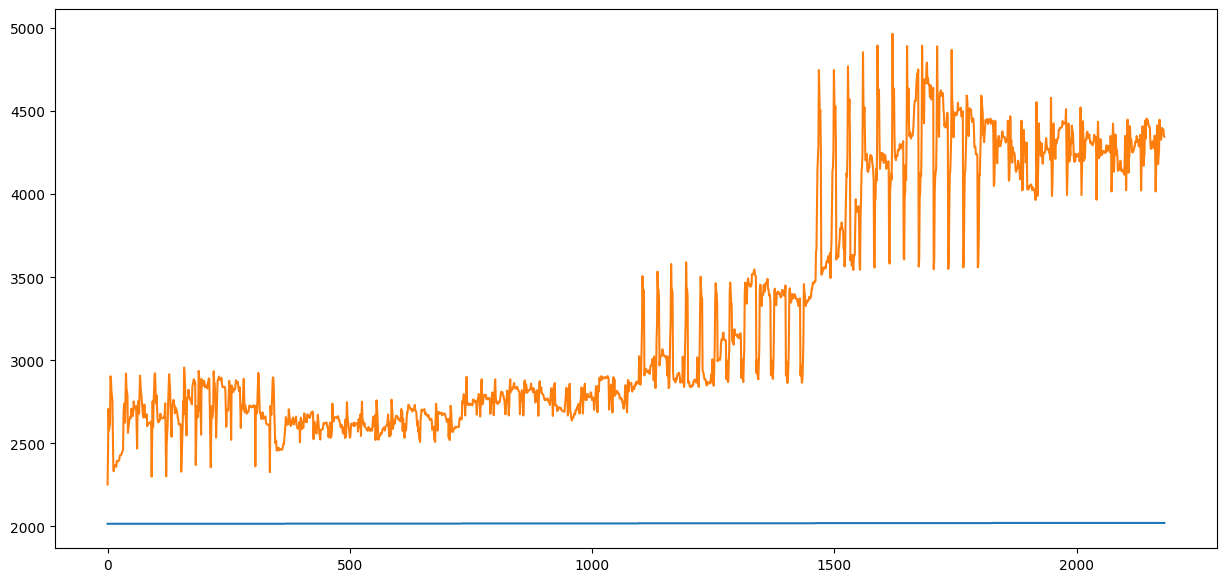

In [46]:
plt.figure(figsize=(15,7))
plt.plot(df2)

In [48]:
df2.loc[:, 'price_diff'] = df2['price'].diff(periods=1)      ## applied diff on price lag=1

In [49]:
df2

,year,price,price_diff
0,2016,2252.60,NaN
1,2016,2454.50,201.90
2,2016,2708.10,253.60
3,2016,2577.80,-130.30
4,2016,2597.75,19.95
...,...,...,...
2177,2021,4394.40,-5.40
2178,2021,4389.50,-4.90
2179,2021,4389.50,0.00
2180,2021,4354.10,-35.40


In [50]:
df2 = df2.dropna()

In [51]:
df2

,year,price,price_diff
1,2016,2454.50,201.90
2,2016,2708.10,253.60
3,2016,2577.80,-130.30
4,2016,2597.75,19.95
5,2016,2617.70,19.95
...,...,...,...
2177,2021,4394.40,-5.40
2178,2021,4389.50,-4.90
2179,2021,4389.50,0.00
2180,2021,4354.10,-35.40


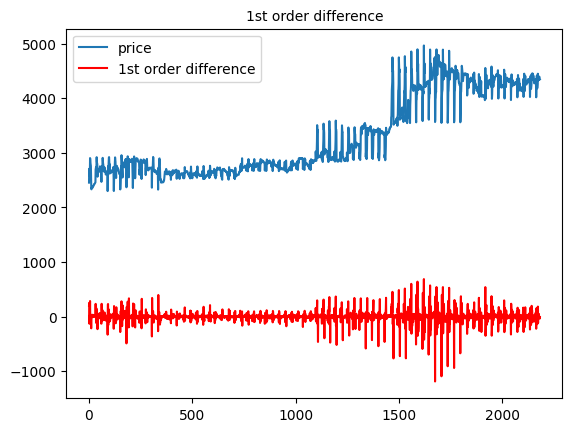

In [52]:
## plot
plt.title("1st order difference", size=10)
plt.plot(df2['price'], label='price')
plt.plot(df2['price_diff'], label = '1st order difference', color='red')
plt.legend()

In [53]:
## calculate autocorrelation
acf_values = acf(df2['price_diff'])
np.round(acf_values,2)

array([ 1.  , -0.01, -0.16, -0.01, -0.04, -0.  , -0.11, -0.18,  0.03,
       -0.02, -0.  ,  0.02, -0.02,  0.01,  0.01,  0.  ,  0.02, -0.01,
       -0.01,  0.01,  0.03, -0.02,  0.01, -0.05, -0.17, -0.05, -0.02,
       -0.03, -0.03, -0.03,  0.31,  0.44, -0.04, -0.08])

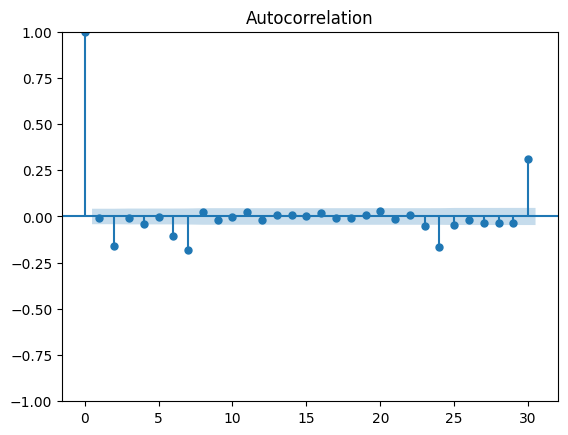

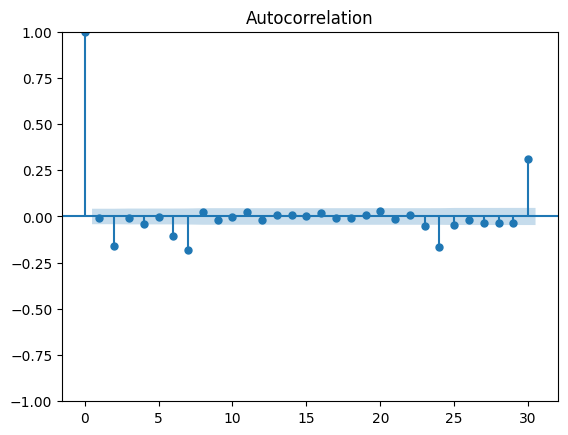

In [54]:
## plot ACF
plot_acf(df2['price_diff'], lags=30)
## shadeed region is standard error region
## 1st values wil be 1 always

### Partial Autocorrealtion Function

In [55]:
## calculate pacf
## it will give direct values
pacf_values = pacf(df2['price_diff'])
np.round(pacf_values,2)

array([ 1.  , -0.01, -0.16, -0.01, -0.07, -0.01, -0.13, -0.2 , -0.03,
       -0.1 , -0.04, -0.04, -0.06, -0.06, -0.06, -0.03, -0.04, -0.03,
       -0.04, -0.03,  0.  , -0.04, -0.  , -0.08, -0.21, -0.13, -0.15,
       -0.16, -0.21, -0.26,  0.08,  0.37,  0.12,  0.07])

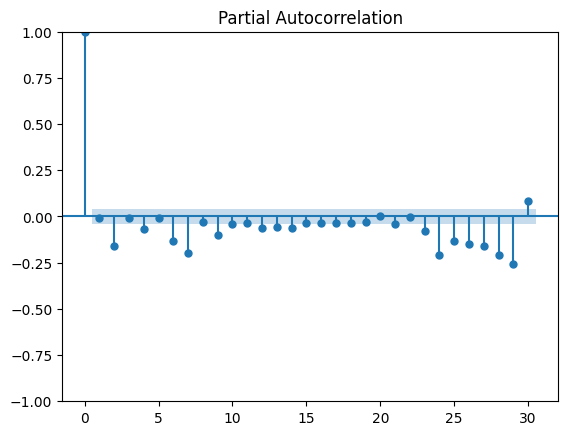

In [56]:
## plot pacf
plot_pacf(df2['price_diff'], lags=30);

In [57]:
daily

,date,price,year
0,1/1/2016,2252.60,2016
1,1/2/2016,2454.50,2016
2,1/3/2016,2708.10,2016
3,1/4/2016,2577.80,2016
4,1/5/2016,2597.75,2016
...,...,...,...
2177,12/17/2021,4394.40,2021
2178,12/18/2021,4389.50,2021
2179,12/19/2021,4389.50,2021
2180,12/20/2021,4354.10,2021


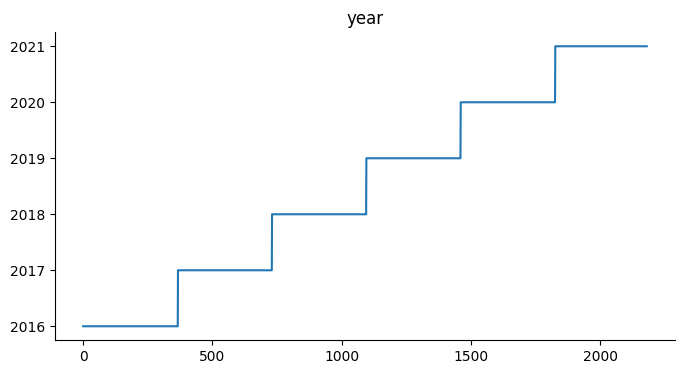

In [59]:
# @title year

from matplotlib import pyplot as plt
daily['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [60]:
## calculate pacf
## it will give direct values
pacf_values = pacf(df2['price_diff'])
np.round(pacf_values,2)

array([ 1.  , -0.01, -0.16, -0.01, -0.07, -0.01, -0.13, -0.2 , -0.03,
       -0.1 , -0.04, -0.04, -0.06, -0.06, -0.06, -0.03, -0.04, -0.03,
       -0.04, -0.03,  0.  , -0.04, -0.  , -0.08, -0.21, -0.13, -0.15,
       -0.16, -0.21, -0.26,  0.08,  0.37,  0.12,  0.07])

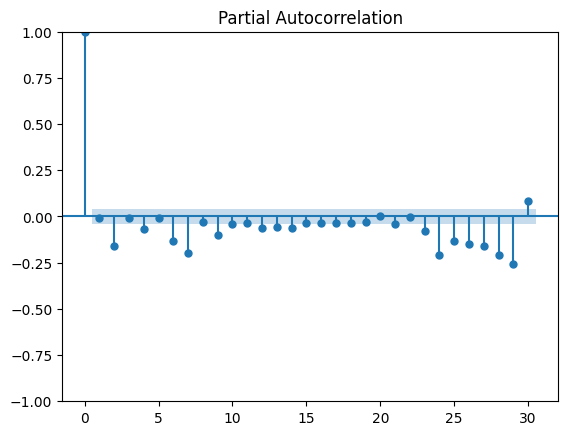

In [64]:
## plot pacf
plot_pacf(df2['price_diff'], lags=30);

In [61]:
## calculate autocorrelation
acf_values = acf(df2['price_diff'])
np.round(acf_values,2)

array([ 1.  , -0.01, -0.16, -0.01, -0.04, -0.  , -0.11, -0.18,  0.03,
       -0.02, -0.  ,  0.02, -0.02,  0.01,  0.01,  0.  ,  0.02, -0.01,
       -0.01,  0.01,  0.03, -0.02,  0.01, -0.05, -0.17, -0.05, -0.02,
       -0.03, -0.03, -0.03,  0.31,  0.44, -0.04, -0.08])

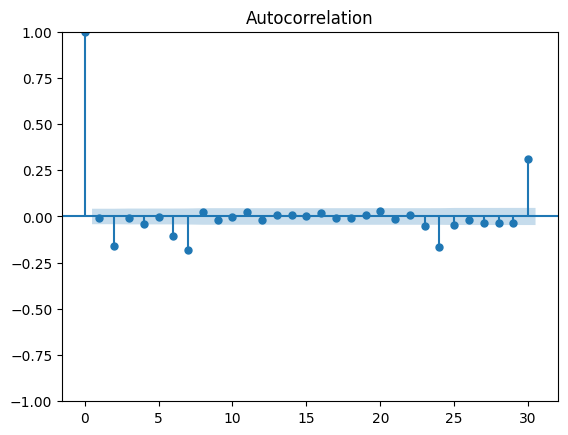

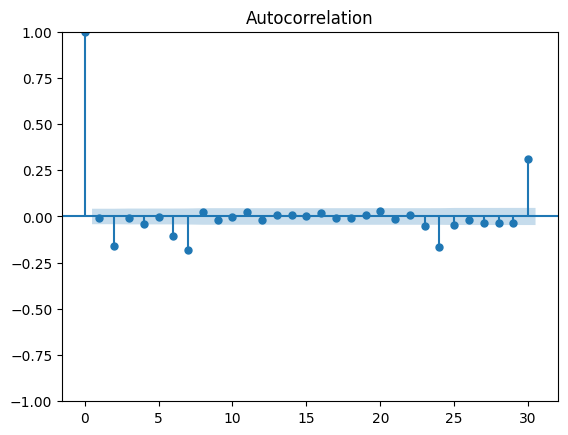

In [63]:
## plot ACF
plot_acf(df2['price_diff'], lags=30)
## shadeed region is standard error region
## 1st values wil be 1 always